# 지역 치안 안전 데이터 분석 경진대회

### 추진 배경 및 목적
- 신종·지능형 범죄 급증 등 급변하는 치안 환경에 발맞춰 치안 데이터 활용, 한정된 경찰력을 선택과 집중에 따라 운영하여 선제적 대응과 시대적 여건에 부응하는 맞춤형 치안 서비스 제공

    - 범죄예방 및 신속한 대응을 할 수 있게 도와줘야 함!

### 응모주제
- 충남·세종·대전 지역 교통사고 분석 및 예측(분석 아이디어 제시, 알고리즘 개발 등) (V)
- 충남·세종·대전 지역 보이스피싱 분석 및 예측
   
   - 분석 후에 예측 알고리즘까지 만들어야겠죠?
    
### 그렇다면 기본틀을 어떻게 잡아야할까?
- 1. 지역선택
- 2. 범죄선택(EVT_CL_CD	: 사건종별코드 참고)
- 3. 사건현황 분석(해당범죄가 몇 건이나 발생했는가, 가장 많이 발생한 시간은 언제인가, 요일과 관련이 있는가, 가장 많이 발생한 지역은 어디인가 ...)
- 4. 알고리즘 제작(후에 예측값 도출)
- 5. 예측률과 이에 따른 기대효과

# Data

In [1]:
import pandas as pd

In [2]:
kp20=pd.read_csv("KP2020.csv")

In [3]:
kp21=pd.read_csv("KP2021.csv")

In [4]:
# 데이터 확인
kp20.info()
print("========================================")
kp21.info()
print("========================================")
# 결측치 처리 여부 논의 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77077 entries, 0 to 77076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   77077 non-null  object 
 1   RECV_CPLT_DM   77077 non-null  object 
 2   NPA_CL         77077 non-null  int64  
 3   EVT_STAT_CD    77077 non-null  int64  
 4   EVT_CL_CD      77077 non-null  int64  
 5   RPTER_SEX      74658 non-null  float64
 6   HPPN_PNU_ADDR  47805 non-null  object 
 7   HPPN_X         60313 non-null  float64
 8   HPPN_Y         60313 non-null  float64
 9   SME_EVT_YN     13442 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594060 entries, 0 to 2594059
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RECV_DEPT_NM   object 
 1   RECV_CPLT_DM   object 
 2   NPA_CL         int64  
 3   EVT_STAT_CD    int64  
 4   EVT_CL_CD      

In [5]:
# 컬럼명 수정
kp20.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)
kp21.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [6]:
kp20

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


## 충남 교통관련 범죄 발생건수

In [9]:
#대전과 충남으로 나누기
cn20=kp20[kp20["접수부서코드"]=="충남청"]
dj20=kp20[kp20["접수부서코드"]=="대전청"]

In [10]:
cn20.info()
print("=====================================================")
dj20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41814 entries, 0 to 77074
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   접수부서코드  41814 non-null  object 
 1   접수완료일시  41814 non-null  object 
 2   경찰청구분   41814 non-null  int64  
 3   사건상태코드  41814 non-null  int64  
 4   사건종별코드  41814 non-null  int64  
 5   신고성별    40533 non-null  float64
 6   발생지점    26495 non-null  object 
 7   발생좌표x   26967 non-null  float64
 8   발생좌표y   26967 non-null  float64
 9   동일사건여부  7696 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34600 entries, 1 to 77076
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   접수부서코드  34600 non-null  object 
 1   접수완료일시  34600 non-null  object 
 2   경찰청구분   34600 non-null  int64  
 3   사건상태코드  34600 non-null  int64  
 4   사건종별코드  34600 non-null  int64  
 5   신고성별    3346

In [11]:
code=cn20.set_index("접수부서코드")
code["사건종별코드"]=code["사건종별코드"].astype("object")
code.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41814 entries, 충남청 to 충남청
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   접수완료일시  41814 non-null  object 
 1   경찰청구분   41814 non-null  int64  
 2   사건상태코드  41814 non-null  int64  
 3   사건종별코드  41814 non-null  object 
 4   신고성별    40533 non-null  float64
 5   발생지점    26495 non-null  object 
 6   발생좌표x   26967 non-null  float64
 7   발생좌표y   26967 non-null  float64
 8   동일사건여부  7696 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.2+ MB


In [362]:
drunken=code[code["사건종별코드"]==406] #음주운전
inconv=code[code["사건종별코드"]==402] #교통불편
viol=code[code["사건종별코드"]==403] #교통위반
a401=code[code["사건종별코드"]==401] #교통사고
a404=code[code["사건종별코드"]==404] #사망 대형사고
a405=code[code["사건종별코드"]==405] #인피도주

voice=code[code["사건종별코드"]==215] #피싱

# traf=code[code["사건종별코드"]== str(4).zfill(3)] #004는 존재하지 않나봅니다 

In [363]:
print("음주운전 발생건수 :",len(drunken),"\n"
      "교통불편 발생건수 :",len(inconv),"\n"
      "교통위반 발생건수 :",len(viol))
print("교통사고 발생건수 :",len(a401))
print("피싱 발생건수 :",len(voice))
# 음주운전, 교통불편, 교통위반 사이의 상관계수 분석도 들어가면 좋을듯 합니다.

음주운전 발생건수 : 923 
교통불편 발생건수 : 609 
교통위반 발생건수 : 267
교통사고 발생건수 : 3505
피싱 발생건수 : 1196


# 오늘 해야할 일 01/29


- 범주 정하기
    - 교통사고

- 주제 정하기
    - 외부데이터 +위도, 경도 사용해서 자주 발생하는 위치 예측하기(주변 시설물과 교통사고 발생 관련도)
    - 자주 발생하는 곳에서 규정속도를 조정해야 한다
    - 보행자 관련 사고
    - 위도경도 참고해서 음주운전 핫플레이스 찾아보기
    
    - 한정된 경찰력을 잘 사용해보는 주제~
        - 잡긴 잡아야 하는데 ....// 교통위반, 음주운전 핫플레이스, 시간대
        
        해당범죄가 몇 건이나 발생했는가, 가장 많이 발생한 시간은 언제인가, 요일과 관련이 있는가, 가장 많이 발생한 지역은 어디인가
            + 시각화팀의 아이디어
        
        [교통사고 발생건수 / 시간 + 요일 + 지역 + 경찰 수] 을 통해서 = 발생지역 예측 OR 발생 시간대 & 요일 예측해서 인력배치를 얼마나 할지
            + 통계팀의 아이디어
    

- 결측치 처리 논의
    - 위치좌표 : 좌표랑 한글 합쳐서 쓰기
- etc
    - 회의시간은 매일 10시
    - 관련 기사, 논문, 데이터 찾아보기
    - 동탄 언제갈지 정하기
    - 수강평 꼭 등록하기
    - 2/1, 3일 쉬자!(회의 없음)
    
    - 2/6일에 1차 발표 /통계 : 동현, 성길   |   시각화 : 하경, 나은
    - git / notion

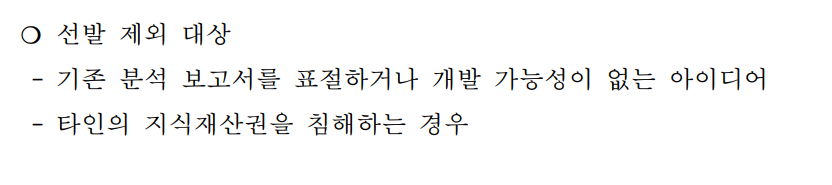

In [ ]:
# lambda 를 활용하여 내용 가져오기
# day=kp21["접수완료일시"].apply(lambda x:x[0:8])
# time=kp21["접수완료일시"].apply(lambda x:x[9:17])